In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
display(HTML("<style>.output_result { max-width:75% !important; }</style>"))
display(HTML("<style>.prompt { display:none !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import median_abs_deviation
from tqdm.notebook import tqdm
from ipywidgets import Video
from PIL import Image

import glob
import lzma
import pickle
import io

In [3]:
# train is true 30 epochs crop pad
# config = 'MFF_ngt_RGBFlow_efficientnet_segment4_3f1c'
# description = 'ngt_with_validate_efficientnet_no_augmentations_is_train_true_crop_pad_30_epochs'
# datetime = '17-05-2021_04PM'

# train is true 35 epochs
# config = 'MFF_ngt_RGBFlow_efficientnet_segment4_3f1c'
# description = 'ngt_with_validate_efficientnet_no_augmentations_is_train_true_35_epochs'
# datetime = '17-05-2021_03PM'

# train is true 30 epochs
# config = 'MFF_ngt_RGBFlow_efficientnet_segment4_3f1c'
# description = 'ngt_with_validate_efficientnet_no_augmentations_is_train_true_30_epochs'
# datetime = '17-05-2021_01PM'

# train is true
# config = 'MFF_ngt_RGBFlow_efficientnet_segment4_3f1c'
# description = 'ngt_with_validate_efficientnet_no_augmentations_is_train_true'
# datetime = '17-05-2021_10AM'

# no augmentations
# config = 'MFF_ngt_RGBFlow_efficientnet_segment4_3f1c'
# description = 'ngt_with_validate_efficientnet_no_augmentations'
# datetime = '13-05-2021_11AM'

# All New No Loss Scale Results
# config = 'MFF_ngt_full_RGBFlow_efficientnetv2_segment4_3f1c'
# description = 'ngt_close_far'
# datetime = '14-09-2021_12PM'

# 150 epochs rerun
# config = 'MFF_ngt_full_RGBFlow_efficientnetv2_segment4_3f1c'
# description = 'ngt_close_far_150_epochs'
# datetime = '14-09-2021_07PM'

# config = 'MFF_ngt_full_RGBFlow_efficientnetv2_segment4_3f1c'
# description = 'ngt_close_far_150_epochs'
# datetime = '15-09-2021_09AM'

# config = 'MFF_ngt_full_RGBFlow_efficientnetv2_segment4_3f1c'
# description = 'ngt_close_far_150_epochs_2'
# datetime = '16-09-2021_09AM'

config = 'MFF_ngt_full_RGBFlow_efficientnetv2_segment4_3f1c'
description = 'ngt_close_far_200_epochs_op_kfe_1'
datetime = '23-09-2021_09AM'



file_path = f'{config}_{description}_{datetime}.xlsx'
print(f'file_path: {file_path}')
df = pd.read_excel(file_path)

file_path: MFF_ngt_full_RGBFlow_efficientnetv2_segment4_3f1c_ngt_close_far_200_epochs_op_kfe_1_23-09-2021_09AM.xlsx


In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Input          50 non-null     object
 1   Close_A        50 non-null     int64 
 2   Close_A_label  50 non-null     int64 
 3   Close_B        50 non-null     int64 
 4   Close_B_label  50 non-null     int64 
 5   Far            50 non-null     int64 
 6   Far_label      50 non-null     int64 
 7   Ranking_Signs  50 non-null     object
 8   Close_A_Sign   50 non-null     object
 9   Close_B_Sign   50 non-null     object
 10  Far_Sign       50 non-null     object
dtypes: int64(6), object(5)
memory usage: 4.4+ KB


None

In [5]:
display(df)

,Input,Close_A,Close_A_label,Close_B,Close_B_label,Far,Far_label,Ranking_Signs,Close_A_Sign,Close_B_Sign,Far_Sign
0,A,0,3254,229,907,505,2086,"[3254, 3182, 3103, 1997, 372, 3105, 3683, 1172...",TURKIJE-A,DUITSLAND-A,MOE-B
1,B,286,3254,0,907,971,2086,"[907, 270, 908, 1190, 1793, 3148, 2114, 3217, ...",TURKIJE-A,DUITSLAND-A,MOE-B
2,A,0,2333,324,2293,1374,2913,"[2333, 2378, 2710, 2402, 2749, 2283, 2231, 272...",OORLOG-A,ONTMOETEN,SLIM-C
3,B,135,2333,0,2293,1416,2913,"[2293, 2283, 2716, 2767, 2291, 2684, 2282, 941...",OORLOG-A,ONTMOETEN,SLIM-C
4,A,0,2118,324,3527,2017,3181,"[2118, 2234, 1391, 2110, 2016, 3373, 3332, 340...",MOSLIM,VOORKOMEN,THEE
5,B,1001,2118,0,3527,2694,3181,"[3527, 461, 1478, 2109, 3595, 1517, 2760, 2136...",MOSLIM,VOORKOMEN,THEE
6,A,0,3181,3263,2961,1315,2726,"[3181, 613, 2158, 1130, 1980, 2050, 3285, 2255...",THEE,SPAREN-A,RIJLES
7,B,3384,3181,1,2961,2952,2726,"[2962, 2961, 3699, 1536, 2612, 3227, 210, 639,...",THEE,SPAREN-A,RIJLES
8,A,0,1817,3,1818,3230,3391,"[1817, 2434, 1883, 1818, 1908, 2713, 2728, 263...",LAATSTE-A,LAATSTE-B,VERGETEN-A
9,B,3,1817,0,1818,3205,3391,"[1818, 2277, 1908, 1817, 1887, 2728, 1907, 194...",LAATSTE-A,LAATSTE-B,VERGETEN-A


In [6]:
# Ranking of the Close Sign
Close_Ranking = df.loc[df['Input'] == 'A', 'Close_B'].tolist() + df.loc[df['Input'] == 'B', 'Close_A'].tolist()
Close_Ranking = np.array(Close_Ranking)

# Ranking of the Far Sign
Far_Ranking = df['Far'].values

# Plot Scatter

Close mean: 972, std: 1085
Far mean: 2139, std: 1084
Std diff: -1003


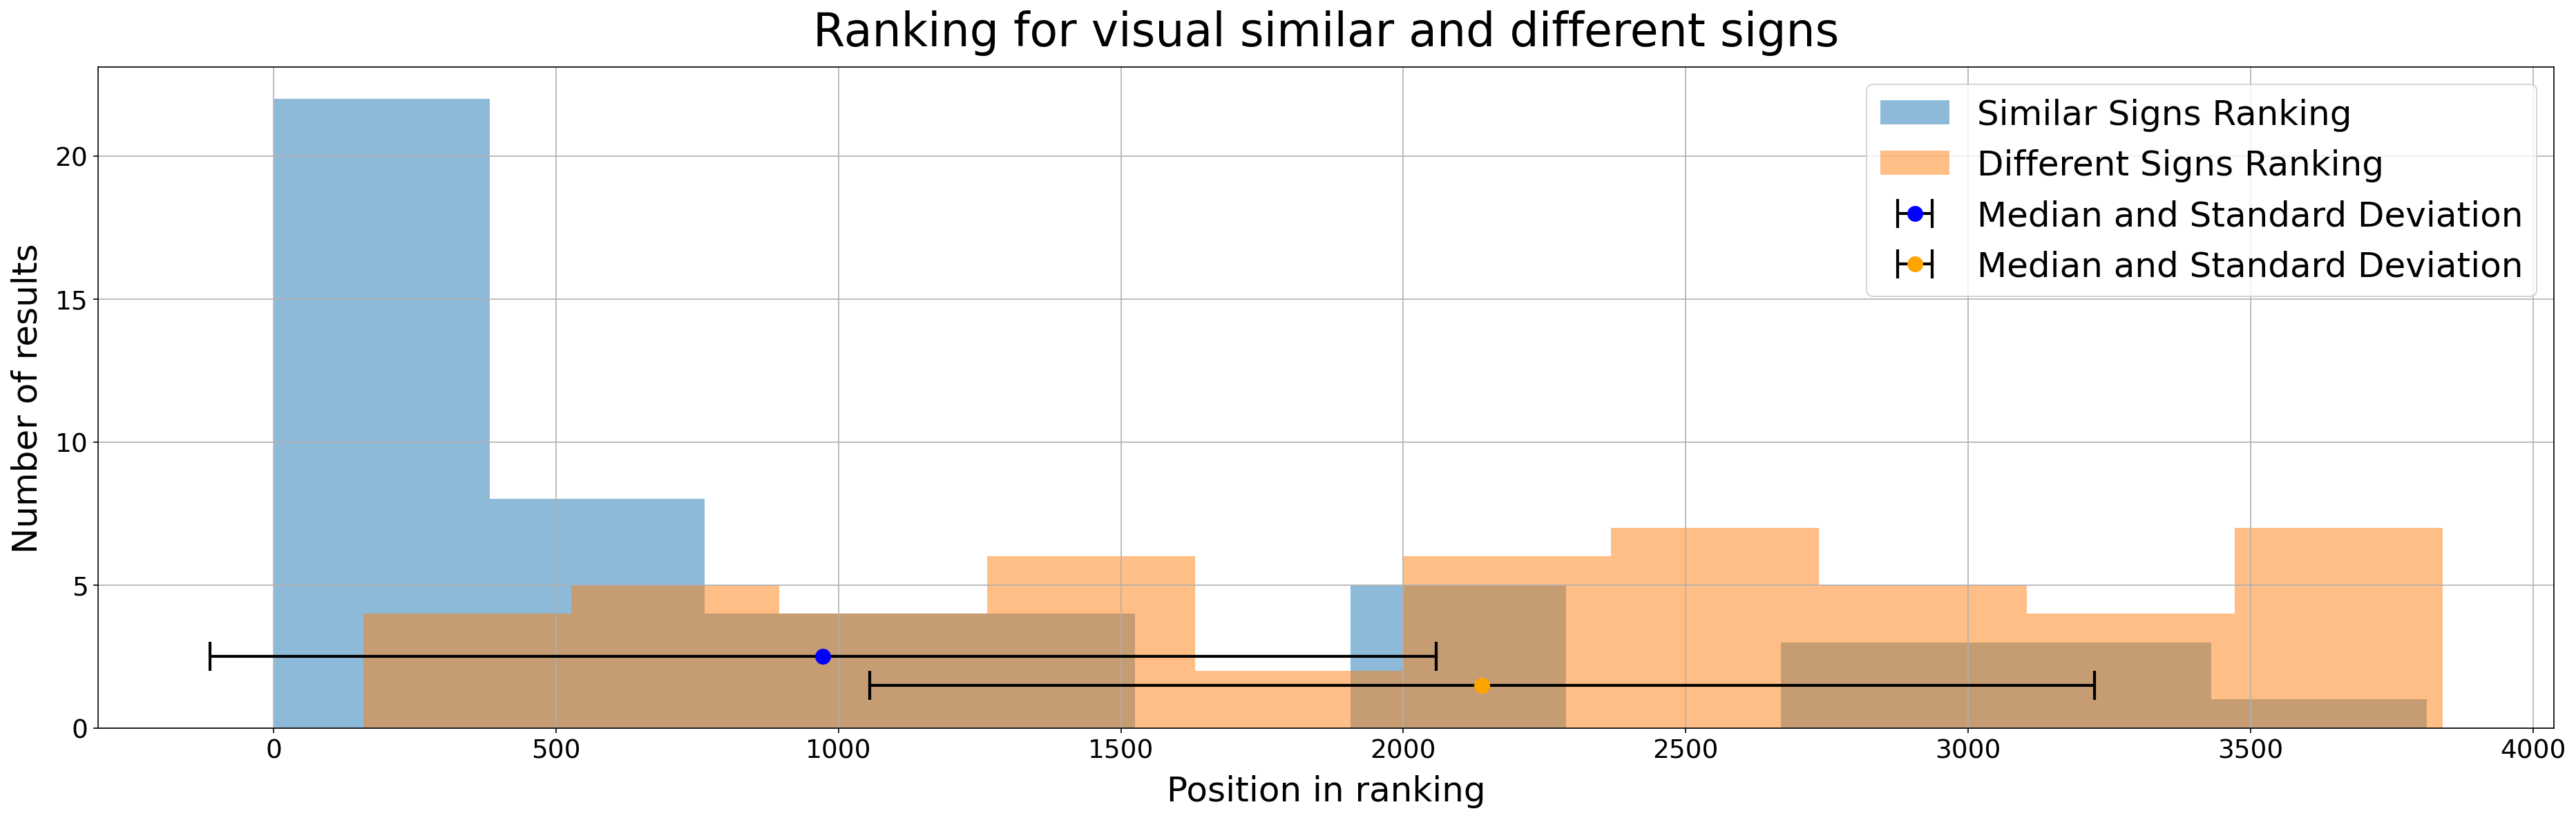

In [19]:
# Config
N_BINS = 10

fig = plt.figure(figsize=(25,8), dpi=150)
fig.set_facecolor('white')
fig.set_edgecolor('white')

plt.ylabel('Number of results', size=24, labelpad=8)
plt.xlabel('Position in ranking', size=24, labelpad=8)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title('Ranking for visual similar and different signs', size=32, pad=15)

#### CLOSE ###
# plt.plot(Close_Ranking, np.zeros_like(Close_Ranking) + close_y_pos, 'x', label='Similar Signs')
plt.hist(Close_Ranking, bins=N_BINS, alpha=0.5, label='Similar Signs Ranking')


### FAR ###
errorbar_config = {
    'capsize': 10, 'ecolor': 'black', 'capthick': 2, 'elinewidth': 2, 'markersize': 10, 'fmt': 'o',
}
Y_MAX = plt.gca().get_ylim()[1]

# plt.plot(Far_Ranking, np.zeros_like(Far_Ranking) + far_y_pos, 'x', label='Different Signs')
plt.hist(Far_Ranking, bins=N_BINS, alpha=0.5, label='Different Signs Ranking')

# Error bar CLOSE
close_median = np.mean(Close_Ranking)
close_std = np.std(Close_Ranking)
print(f'Close mean: {int(close_median):d}, std: {int(close_std):d}')
plt.errorbar(close_median, 2.5, xerr=close_std, color='blue', label='Median and Standard Deviation', **errorbar_config)


# Error bar FAR
far_median = np.mean(Far_Ranking)
far_std = np.std(Far_Ranking)
print(f'Far mean: {int(far_median):d}, std: {int(far_std):d}')
print(f'Std diff: {int((far_median - far_std) - (close_median + close_std)):d}')
plt.errorbar(far_median, 1.5, xerr=far_std, color='orange', label='Median and Standard Deviation', **errorbar_config)

# Add legend
plt.legend(prop={'size': 24})
# Add grid
plt.grid()
# Padding
plt.tight_layout(h_pad=100)

plt.show()

# Label and FolderID

In [8]:
# df = pd.read_csv('../../../train_ngt.csv', skiprows=1)
df_sign_config = pd.read_pickle('../../../train_ngt_dxy_10fps.pkl')

display(df_sign_config.head())

,file_path,file_name,sign_names,label,is_studio,frame_count,folder_index,Signbank ID,left_dx_rolling1_10fps,left_dy_rolling1_10fps,...,right_dx_rolling4_10fps,right_dy_rolling4_10fps,left_dx_rolling5_10fps,left_dy_rolling5_10fps,right_dx_rolling5_10fps,right_dy_rolling5_10fps,Handedness,HandednessNorm,Handedness Predicted,keyframe_idxs
0,C:/Users/markw/Documents/Master Stage Videos/N...,#A-3808.mp4,#A,0,True,31,0,3808,"(0.0, -0.013702392578125, -0.0022430419921875,...","(0.0, 0.97222900390625, -0.98895263671875, -1....",...,"(0.0, 0.0010986328125, -4.6719970703125, -11.2...","(0.0, 0.4927215576171875, -2.3442789713541665,...","(0.0, -0.0068511962890625, -0.0053151448567708...","(0.0, 0.486114501953125, -0.005574544270833333...","(0.0, 0.0010986328125, -4.6719970703125, -11.2...","(0.0, 0.4927215576171875, -2.3442789713541665,...",1,1.0,True,"(4, 13, 22, 31)"
1,C:/Users/markw/Documents/Master Stage Videos/N...,#B-3809.mp4,#B,1,True,31,1,3809,"(0.0, 1.9644317626953125, -0.0078125, 0.994171...","(0.0, -4.9708251953125, 0.00933837890625, 3.94...",...,"(0.0, -3.4920806884765625, -4.995005289713542,...","(0.0, -2.9847564697265625, -7.659403483072917,...","(0.0, 0.9822158813476562, 0.6522064208984375, ...","(0.0, -2.48541259765625, -1.6538289388020833, ...","(0.0, -3.4920806884765625, -4.995005289713542,...","(0.0, -2.9847564697265625, -7.659403483072917,...",1,1.0,True,"(4, 13, 22, 31)"
2,C:/Users/markw/Documents/Master Stage Videos/N...,#C-3810.mp4,#C,2,True,30,2,3810,"(0.0, -1.009979248046875, 0.0061798095703125, ...","(0.0, 1.013702392578125, 0.965545654296875, -4...",...,"(0.0, 0.00383758544921875, 0.005218505859375, ...","(0.0, 0.4886932373046875, -0.00194295247395833...","(0.0, -0.5049896240234375, -0.3345998128255208...","(0.0, 0.5068511962890625, 0.6597493489583334, ...","(0.0, 0.00383758544921875, 0.005218505859375, ...","(0.0, 0.4886932373046875, -0.00194295247395833...",1,1.0,True,"(4, 12, 21, 30)"
3,C:/Users/markw/Documents/Master Stage Videos/N...,#D-3811.mp4,#D,3,True,31,3,3811,"(0.0, -0.0216827392578125, 0.0353546142578125,...","(0.0, 0.959136962890625, -0.971771240234375, -...",...,"(0.0, 0.9865646362304688, 0.9886983235677084, ...","(0.0, 0.021759033203125, 0.009602864583333334,...","(0.0, -0.01084136962890625, 0.0045572916666666...","(0.0, 0.4795684814453125, -0.00421142578125, -...","(0.0, 0.9865646362304688, 0.9886983235677084, ...","(0.0, 0.021759033203125, 0.009602864583333334,...",1,1.0,True,"(4, 13, 22, 31)"
4,C:/Users/markw/Documents/Master Stage Videos/N...,#E-3812.mp4,#E,4,True,39,4,3812,"(0.0, 0.9373779296875, 0.034088134765625, 0.04...","(0.0, -0.014434814453125, -0.97845458984375, 0...",...,"(0.0, -0.5047454833984375, -1.3313802083333333...","(0.0, -0.02423095703125, -2.656463623046875, -...","(0.0, 0.46868896484375, 0.323822021484375, 0.2...","(0.0, -0.0072174072265625, -0.330963134765625,...","(0.0, -0.5047454833984375, -1.3313802083333333...","(0.0, -0.02423095703125, -2.656463623046875, -...",1,1.0,True,"(4, 15, 27, 39)"


In [9]:
def get_sign_info(query):
    # Exact Match
    for idx, row in df_sign_config.iterrows():
        if query.lower() == row['sign_names'].lower():
            display(row[['file_name', 'sign_names', 'label', 'folder_index', 'Signbank ID']].to_frame())
            return
    # Substring
    for idx, row in df_sign_config.iterrows():
        if query.lower() in row['sign_names'].lower():
            display(row[['file_name', 'sign_names', 'label', 'folder_index', 'Signbank ID']].to_frame())
        
get_sign_info('ONTSPANNEN-B')

,2300
file_name,ONTSPANNEN-B-572.mp4
sign_names,ONTSPANNEN-B
label,2300
folder_index,2339
Signbank ID,572


# Mitake Analysis

In [15]:
def get_mffs_by_folder_index(folder_index):
    N_FRAMES = 9
    N_MFF_FRAMES = 4
    TARGET_IMG_SIZE = 224
    
    FOLDER_PATH = 'D:/MEGA/Nijmegen/Master Stage/notebooks/MFF-pytorch/datasets/pickle/ngt_full_4-MFFs-3f1c_10fps_of_kfe_fr2_train'
    with lzma.LZMAFile(f'{FOLDER_PATH}/{folder_index}.xr', 'rb') as f:
        record = pickle.load(f)
        mffs, attributes = record
        print(f'attributes: {attributes}')
            
    imgs_square = np.empty(shape=[N_FRAMES * N_MFF_FRAMES, TARGET_IMG_SIZE, TARGET_IMG_SIZE], dtype=np.uint8)
    frame_idx = 0
    for frame_options in mffs:
        frame_option_idx = np.random.randint(0, len(frame_options))
        mff = frame_options[frame_option_idx]
        for img in mff:
            img_pil = Image.open(io.BytesIO(img))
            n_channels = 3 if img_pil.mode == 'RGB' else 1
            img_np = np.array(img_pil)

            h, w = img_np.shape[:2]

            offset = (w - h) // 2
            img_np = img_np[:, offset:offset+h]

            if n_channels > 1:
                img_np = np.moveaxis(img_np, 2 ,0)

            imgs_square[frame_idx:frame_idx+n_channels] = img_np
            frame_idx += n_channels

    return imgs_square

attributes: {'label': 146}


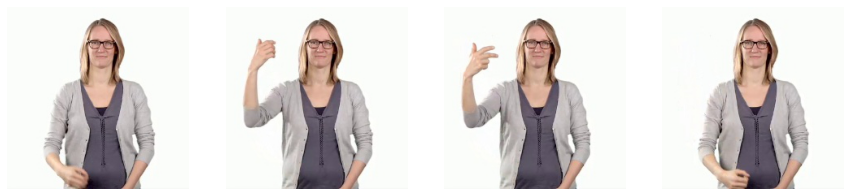

In [16]:
def plot_mffs(folder_index, N_MFF_FRAMES=4, N_IMAGES=7, N_FRAMES=9, RGB_ONLY=False):
    mffs = get_mffs_by_folder_index(folder_index)
    if RGB_ONLY: # RGB
        fig, axes = plt.subplots(1, N_MFF_FRAMES, figsize=(15, N_MFF_FRAMES*2))
        for col in range(N_MFF_FRAMES):
            start_idx = col * N_FRAMES + N_IMAGES - 1
            stop_idx = col * N_FRAMES + N_IMAGES - 1 + 3
            rgb_img = mffs[start_idx:stop_idx]
            rgb_img = np.moveaxis(rgb_img, 0, 2).astype(np.uint8)
            axes[col].imshow(rgb_img)
            axes[col].axis('off')
    else: # RGB and OF
        fig, axes = plt.subplots(N_MFF_FRAMES, N_IMAGES, figsize=(15, N_MFF_FRAMES*2))
        if type(mffs) == np.ndarray:
            for row in range(N_MFF_FRAMES):
                for col in range(N_IMAGES):
                    if col == N_IMAGES - 1:
                        rgb_img = mffs[row * N_FRAMES + col:row * N_FRAMES + col + 3]
                        rgb_img = np.moveaxis(rgb_img, 0, 2).astype(np.uint8)
                        axes[row, col].imshow(rgb_img)
                    else:
                        axes[row, col].imshow(mffs[row * N_FRAMES + col].astype(np.uint8))
        else:
            for row, mff_options in enumerate(mffs):
                for col, img in enumerate(mff_options[0]):
                    axes[row, col].imshow(img)
    plt.show()
    
plot_mffs(146, RGB_ONLY=True)

In [17]:
VIDEO_FOLDER_PATH = 'C:/Users/markw/Documents/Master Stage Videos/NGTvideos'
signs = [fp.replace('\\', '/') for fp in glob.glob(f'{VIDEO_FOLDER_PATH}/*.mp4') if 'small.mp4' not in fp]

def get_sign_by_name(name):
    for s in signs:
        sign_name = s.split('/')[-1]
        if sign_name.startswith(name):
            return s
        
def get_folder_idx_by_label(label):
    return df_sign_config.loc[df_sign_config['label'] == label, 'folder_index'].squeeze()

,6
Input,A
Close_A,0
Close_A_label,3181
Close_B,3263
Close_B_label,2961
Far,1315
Far_label,2726
Ranking_Signs,"[3181, 613, 2158, 1130, 1980, 2050, 3285, 2255..."
Close_A_Sign,THEE
Close_B_Sign,SPAREN-A


Input A
Input: THEE, label: 3181, folder idx: 3228, inp_pos: 0


Video(value=b'\x00\x00\x00 ftypM4V \x00\x00\x00\x01M4V M4A isommp42\x00\x00\x00\x01mdat\x00\x00\x00\x00\x00\x0…

attributes: {'label': 3181}


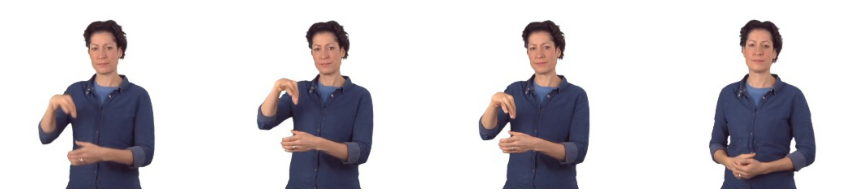

Close: SPAREN-A, close_label: 2961, folder_idx:: 3007, close_pos: 3263


Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01isommp41avc1\x00\x00\x0cumoov\x00\x00\x00*iods\x00\x00\x…

attributes: {'label': 2961}


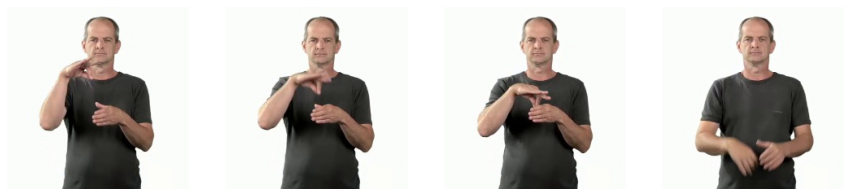

2nd video retrieved, sign: BOWLINGCENTRUM, label: 613


Video(value=b'\x00\x00\x00 ftypM4V \x00\x00\x00\x01M4V M4A isommp42\x00\x00\x00\x01mdat\x00\x00\x00\x00\x00\x0…

attributes: {'label': 613}


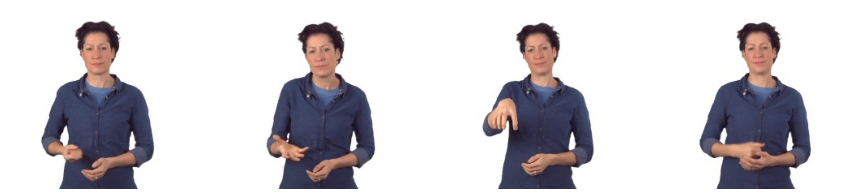

3rd video retrieved, sign: NAKOMEN, label: 2158


Video(value=b'\x00\x00\x00 ftypM4V \x00\x00\x00\x01M4V M4A isommp42\x00\x00\x00\x01mdat\x00\x00\x00\x00\x00\x0…

attributes: {'label': 2158}


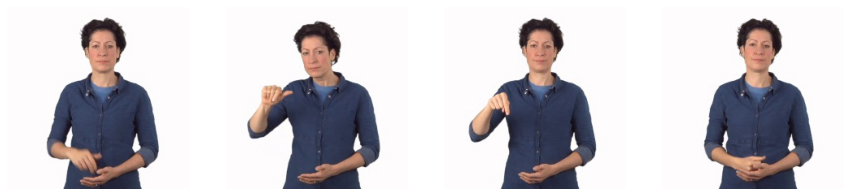

,7
Input,B
Close_A,3384
Close_A_label,3181
Close_B,1
Close_B_label,2961
Far,2952
Far_label,2726
Ranking_Signs,"[2962, 2961, 3699, 1536, 2612, 3227, 210, 639,..."
Close_A_Sign,THEE
Close_B_Sign,SPAREN-A


Input B
Input: SPAREN-A, label: 2961, folder idx: 3007, inp_pos: 1


Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01isommp41avc1\x00\x00\x0cumoov\x00\x00\x00*iods\x00\x00\x…

attributes: {'label': 2961}


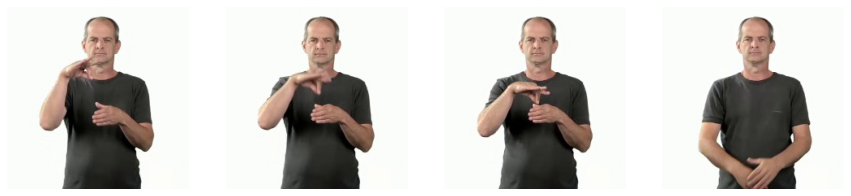

Close: THEE, close_label: 3181, folder_idx:: 3228, close_pos: 3384


Video(value=b'\x00\x00\x00 ftypM4V \x00\x00\x00\x01M4V M4A isommp42\x00\x00\x00\x01mdat\x00\x00\x00\x00\x00\x0…

attributes: {'label': 3181}


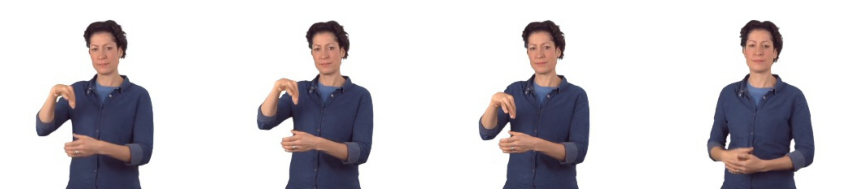

2nd video retrieved, sign: SPAREN-A, label: 2961


Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01isommp41avc1\x00\x00\x0cumoov\x00\x00\x00*iods\x00\x00\x…

attributes: {'label': 2961}


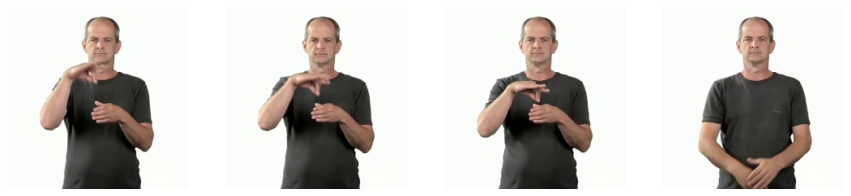

3rd video retrieved, sign: WIM-EMMERIK, label: 3699


Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01isommp41avc1\x00\x00\x0b\x94moov\x00\x00\x00*iods\x00\x0…

attributes: {'label': 3699}


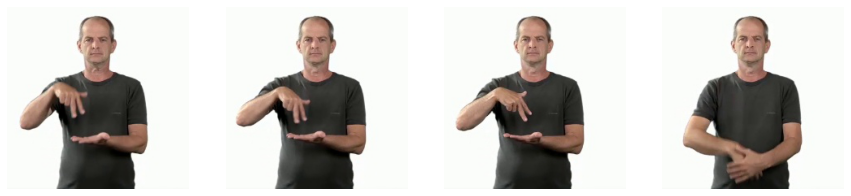

,11
Input,B
Close_A,2927
Close_A_label,2411
Close_B,0
Close_B_label,591
Far,798
Far_label,1857
Ranking_Signs,"[591, 1017, 1016, 2320, 554, 1223, 1806, 284, ..."
Close_A_Sign,OUDER-B
Close_B_Sign,BOOS-B


Input B
Input: BOOS-B, label: 591, folder idx: 593, inp_pos: 0


Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01isommp41avc1\x00\x00\r\xc1moov\x00\x00\x00*iods\x00\x00\…

attributes: {'label': 591}


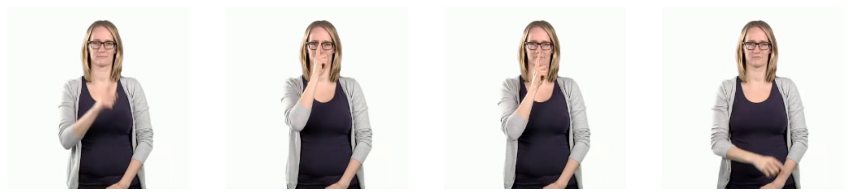

Close: OUDER-B, close_label: 2411, folder_idx:: 2453, close_pos: 2927


Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01isommp41avc1\x00\x00\nbmoov\x00\x00\x00*iods\x00\x00\x00…

attributes: {'label': 2411}


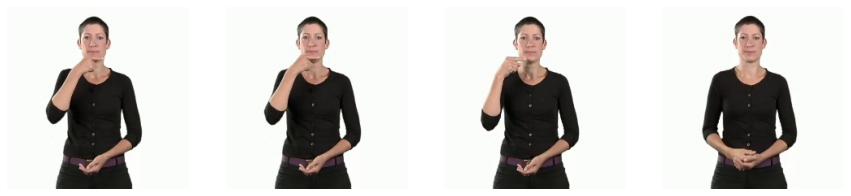

2nd video retrieved, sign: EVEN-DENKEN-B, label: 1017


Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01isommp41avc1\x00\x00\x0ekmoov\x00\x00\x00*iods\x00\x00\x…

attributes: {'label': 1017}


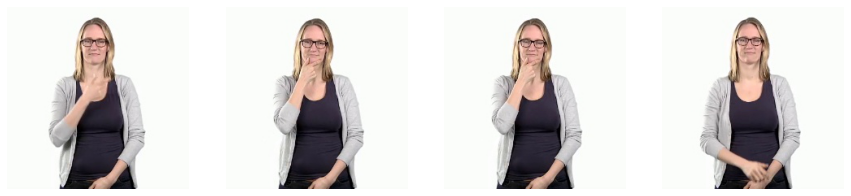

3rd video retrieved, sign: EVEN-DENKEN-A, label: 1016


Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01isommp41avc1\x00\x00\r\xe0moov\x00\x00\x00*iods\x00\x00\…

attributes: {'label': 1016}


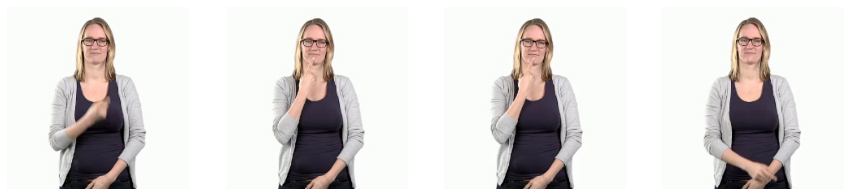

,30
Input,A
Close_A,0
Close_A_label,1659
Close_B,3812
Close_B_label,2743
Far,681
Far_label,907
Ranking_Signs,"[1659, 1705, 2452, 1631, 1667, 1592, 1692, 168..."
Close_A_Sign,KEUKEN
Close_B_Sign,ROK


Input A
Input: KEUKEN, label: 1659, folder idx: 1678, inp_pos: 0


Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01isommp41avc1\x00\x00\rgmoov\x00\x00\x00*iods\x00\x00\x00…

attributes: {'label': 1659}


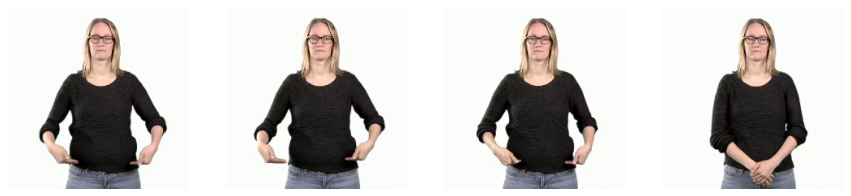

Close: ROK, close_label: 2743, folder_idx:: 2787, close_pos: 3812


Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01isommp41avc1\x00\x00\x0cUmoov\x00\x00\x00*iods\x00\x00\x…

attributes: {'label': 2743}


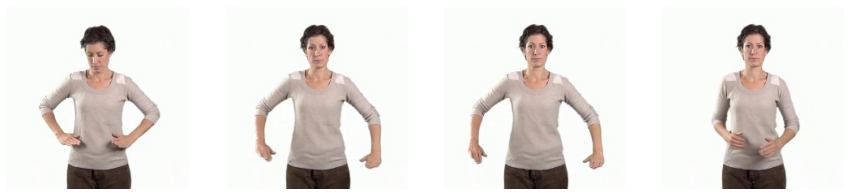

2nd video retrieved, sign: KLEIN-VERTICAAL-F, label: 1705


Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01isommp41avc1\x00\x00\x0b\xdcmoov\x00\x00\x00*iods\x00\x0…

attributes: {'label': 1705}


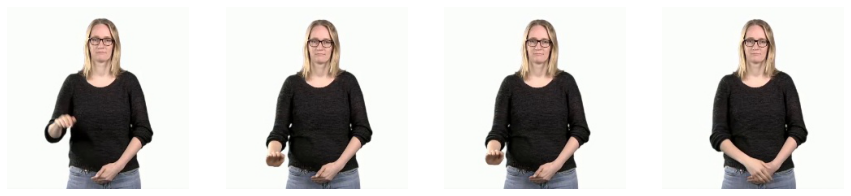

3rd video retrieved, sign: PAN-A, label: 2452


Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01isommp41avc1\x00\x00\r\x99moov\x00\x00\x00*iods\x00\x00\…

attributes: {'label': 2452}


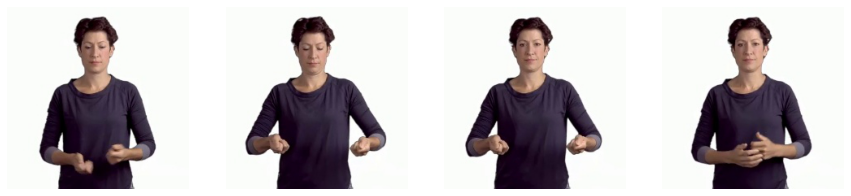

,31
Input,B
Close_A,3218
Close_A_label,1659
Close_B,0
Close_B_label,2743
Far,3538
Far_label,907
Ranking_Signs,"[2743, 2268, 2455, 2750, 3658, 2752, 2731, 289..."
Close_A_Sign,KEUKEN
Close_B_Sign,ROK


Input B
Input: ROK, label: 2743, folder idx: 2787, inp_pos: 0


Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01isommp41avc1\x00\x00\x0cUmoov\x00\x00\x00*iods\x00\x00\x…

attributes: {'label': 2743}


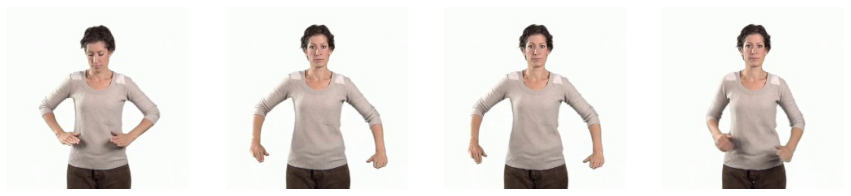

Close: KEUKEN, close_label: 1659, folder_idx:: 1678, close_pos: 3218


Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01isommp41avc1\x00\x00\rgmoov\x00\x00\x00*iods\x00\x00\x00…

attributes: {'label': 1659}


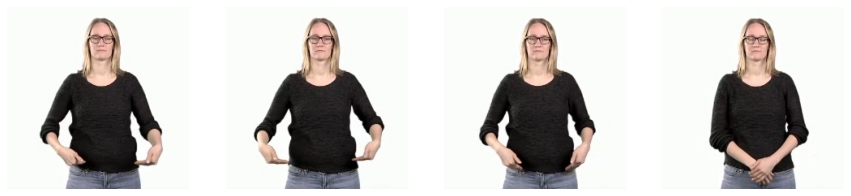

2nd video retrieved, sign: ONDERLICHAAM, label: 2268


Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01isommp41avc1\x00\x00\x0b\xb8moov\x00\x00\x00*iods\x00\x0…

attributes: {'label': 2268}


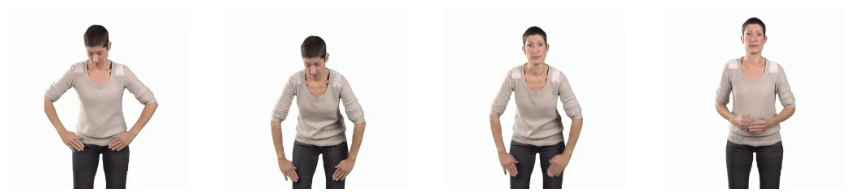

3rd video retrieved, sign: PANIEK-B, label: 2455


Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01isommp41avc1\x00\x00\r\x00moov\x00\x00\x00*iods\x00\x00\…

attributes: {'label': 2455}


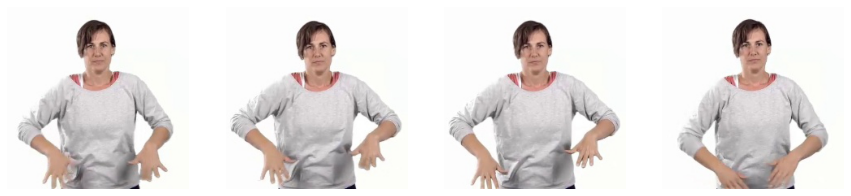

,45
Input,B
Close_A,2874
Close_A_label,2194
Close_B,0
Close_B_label,2300
Far,3006
Far_label,27
Ranking_Signs,"[2300, 2302, 2301, 2374, 2713, 1943, 1932, 224..."
Close_A_Sign,NIKS-G
Close_B_Sign,ONTSPANNEN-B


Input B
Input: ONTSPANNEN-B, label: 2300, folder idx: 2339, inp_pos: 0


Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01isommp41avc1\x00\x00\x0c\xe1moov\x00\x00\x00*iods\x00\x0…

attributes: {'label': 2300}


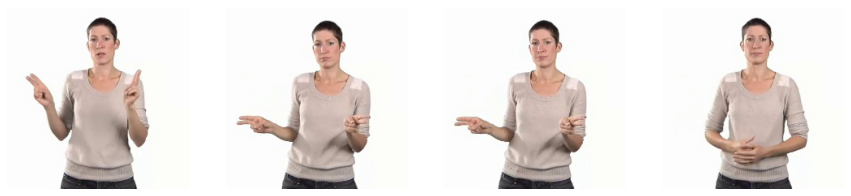

Close: NIKS-G, close_label: 2194, folder_idx:: 2223, close_pos: 2874


Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01isommp41avc1\x00\x00\x0b:moov\x00\x00\x00*iods\x00\x00\x…

attributes: {'label': 2194}


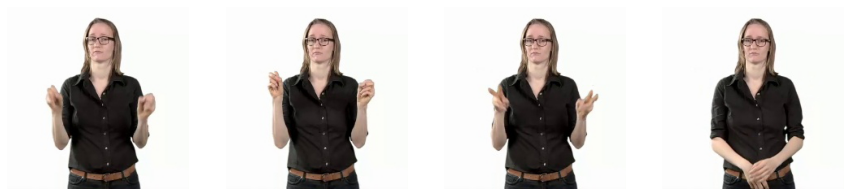

2nd video retrieved, sign: ONTSPANNEN-D, label: 2302


Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01isommp41avc1\x00\x00\x0cumoov\x00\x00\x00*iods\x00\x00\x…

attributes: {'label': 2302}


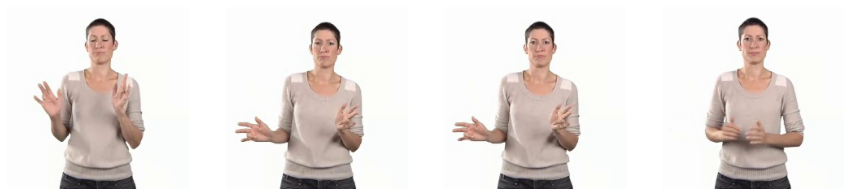

3rd video retrieved, sign: ONTSPANNEN-C, label: 2301


Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01isommp41avc1\x00\x00\x0b\xf2moov\x00\x00\x00*iods\x00\x0…

attributes: {'label': 2301}


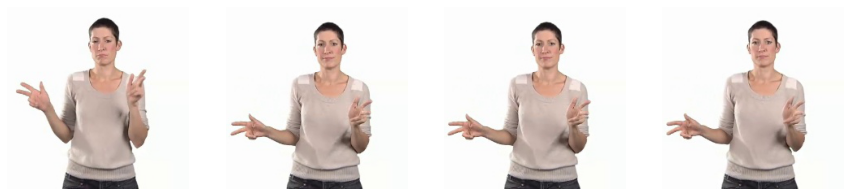

In [18]:
width = 480
RGB_ONLY = True

for idx, row in df.iterrows():
    diff = abs(row['Close_A'] - row['Close_B'])
    if diff > 2800:
        display(pd.DataFrame(row))

        inp_a = row['Input'] == 'A'
        print(f'Input {"A" if inp_a else "B"}')
        inp = row['Close_A_Sign'] if inp_a else row['Close_B_Sign']
        inp_label = row['Close_A_label'] if inp_a else row['Close_B_label']
        inp_pos = row['Close_A'] if inp_a else row['Close_B']
        close = row['Close_B_Sign'] if inp_a else row['Close_A_Sign']
        close_label = row['Close_B_label'] if inp_a else row['Close_A_label']
        close_pos = row['Close_B'] if inp_a else row['Close_A']
            
        # Folder Index
        inp_folder_idx = get_folder_idx_by_label(inp_label)
        close_folder_idx = get_folder_idx_by_label(close_label)
            
        # Display Close Far
        print(f'Input: {inp}, label: {inp_label}, folder idx: {inp_folder_idx}, inp_pos: {inp_pos}')
        display(Video.from_file(get_sign_by_name(inp), width=width))
        plot_mffs(inp_folder_idx, RGB_ONLY=RGB_ONLY)
        
        print(f'Close: {close}, close_label: {close_label}, folder_idx:: {close_folder_idx}, close_pos: {close_pos}')
        display(Video.from_file(get_sign_by_name(close), width=width))
        plot_mffs(close_folder_idx, RGB_ONLY=RGB_ONLY)
        
        # Display 2nd and 3rd video
        rankings = [int(i) for i in row['Ranking_Signs'][1:-1].split(',')]
        
        sign_2nd = df_sign_config.loc[df_sign_config['label'] == int(rankings[1])].squeeze()
        print(f'2nd video retrieved, sign: {sign_2nd["sign_names"]}, label: {sign_2nd["label"]}')
        display(Video.from_file(sign_2nd['file_path'], width=width))
        plot_mffs(sign_2nd['folder_index'], RGB_ONLY=RGB_ONLY)
        
        sign_3rd = df_sign_config.loc[df_sign_config['label'] == int(rankings[2])].squeeze()
        print(f'3rd video retrieved, sign: {sign_3rd["sign_names"]}, label: {sign_3rd["label"]}')
        display(Video.from_file(sign_3rd['file_path'], width=width))
        plot_mffs(sign_3rd['folder_index'], RGB_ONLY=RGB_ONLY)
        
        print('=' * 50)
        print('=' * 50)